<a href="https://colab.research.google.com/github/leandrorodor/PGR-IESB-P9045-CDNA-20203/blob/main/web_scraping_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

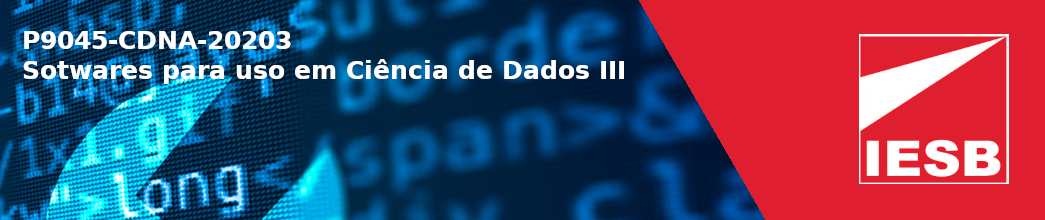

## Web Scraping com R

Requisitos
* SelectGadget Chrome Extension (https://chrome.google.com/webstore/detail/selectorgadget/mhjhnkcfbdhnjickkkdbjoemdmbfginb?hl=pt-BR)
* R

URL
* https://www.truckpad.com.br/fretes/

Equivalente em Python
* BeautifulSoup (https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

## Utilizando R nativo no Google Colab

[Clique aqui!](https://colab.research.google.com/notebook#create=true&language=r)

## Verificando versão do R

In [ ]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.4                         
year           2021                        
month          02                          
day            15                          
svn rev        80002                       
language       R                           
version.string R version 4.0.4 (2021-02-15)
nickname       Lost Library Book           

## Definir área de trabalho

In [ ]:
setwd("/content/sample_data/scraping")

## Instalar packages do projeto

In [ ]:
install.packages("rvest")
install.packages("dplyr")
install.packages("xml2")
install.packages("data.table")
install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Carregar bibliotecas necessárias para scraping

In [ ]:
library(rvest)
library(dplyr)
library(xml2)
library(data.table)
library(tidyr)

# Modo Básico

## Criar variáveis

In [ ]:
link = "https://www.truckpad.com.br/fretes/"

In [ ]:
htmlPage = read_html(link)

In [ ]:
htmlPage

{html_document}
<html lang="pt-BR">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body>\n<noscript><iframe src="https://www.googletagmanager.com/ns.html?i ...

In [ ]:
origem <- htmlPage %>%
  html_nodes(".route .information:nth-child(1) .information-content") %>% # não confundir com html_node
  html_text()

In [ ]:
origem

[1] "SP - Leme"              "SP - Campinas"          "SP - Suzano"           
 [4] "TO - Lagoa da Confusão" "SP - Vinhedo"           "GO - Formosa"          
 [7] "PB - Campina Grande"    "GO - Anápolis"          "SP - Ribeirão Preto"   
[10] "RS - Bento Gonçalves"   "SP - Guarulhos"         "SP - Itaquaquecetuba"  
[13] "SP - São Paulo"         "MG - Nova Lima"         "MS - Angélica"         
[16] "MS - Angélica"          "MS - Angélica"          "MS - Naviraí"          
[19] "MS - Naviraí"           "MS - Naviraí"

In [ ]:
destinos <- htmlPage %>%
  html_nodes(".route .information+ .information .information-content") %>%
  html_text()

In [ ]:
destinos

[1] "MG - Uberaba"        "SP - São Paulo"      "MS - Campo Grande"  
 [4] "MG - Uberlândia"     "AC - Rio Branco"     "MG - Betim"         
 [7] "SP - Guarulhos"      "SP - Leme"           "MG - Indianópolis"  
[10] "PR - Maringá"        "PE - Recife"         "ES - Serra"         
[13] "RJ - Rio de Janeiro" "MG - Jaíba"          "PR - Guarapuava"    
[16] "PR - Guarapuava"     "PR - Guarapuava"     "PR - Tapejara"      
[19] "PR - Tapejara"       "PR - Tapejara"

In [ ]:
preco <- htmlPage %>%
  html_nodes(".information-price .information-content") %>%
  html_text()

In [ ]:
preco

[1] "R$ 500,00"   "R$ 350,00"   "R$ 2.500,00" "R$ 150,00"   "R$ 9.000,00"
 [6] "R$ 800,00"   "R$ 7.800,00" "R$ 150,00"   "R$ 1.400,00" "R$ 3.800,00"
[11] "A combinar"  "A combinar"  "R$ 300,00"   "A combinar"  "R$ 150,00"  
[16] "R$ 150,00"   "R$ 150,00"   "R$ 150,00"   "R$ 150,00"   "R$ 150,00"

In [ ]:
peso <- htmlPage %>%
  html_nodes(".card-content-detail .information-end") %>%
  html_text()

In [ ]:
peso

[1] "0.35 Ton"  ""          "3 Ton"     ""          "0.11 Ton"  ""         
 [7] "0.001 Ton" ""          "6 Ton"     ""          "0.35 Ton"  ""         
[13] "27 Ton"    ""          "14 Ton"    ""          "12 Ton"    ""         
[19] "28 Ton"    ""          "1.6 Ton"   ""          "26 Ton"    ""         
[25] "0.6 Ton"   ""          "4 Ton"     ""          "45 Ton"    ""         
[31] "32 Ton"    ""          "25 Ton"    ""          "45 Ton"    ""         
[37] "32 Ton"    ""          "25 Ton"    ""

In [ ]:
truckpad = data.frame(origem,destinos,peso,preco)

In [ ]:
truckpad

origem,destinos,peso,preco
<chr>,<chr>,<chr>,<chr>
SP - Leme,MG - Uberaba,0.35 Ton,"R$ 500,00"
SP - Campinas,SP - São Paulo,,"R$ 350,00"
SP - Suzano,MS - Campo Grande,3 Ton,"R$ 2.500,00"
TO - Lagoa da Confusão,MG - Uberlândia,,"R$ 150,00"
SP - Vinhedo,AC - Rio Branco,0.11 Ton,"R$ 9.000,00"
GO - Formosa,MG - Betim,,"R$ 800,00"
PB - Campina Grande,SP - Guarulhos,0.001 Ton,"R$ 7.800,00"
GO - Anápolis,SP - Leme,,"R$ 150,00"
SP - Ribeirão Preto,MG - Indianópolis,6 Ton,"R$ 1.400,00"


# Modo avançado

In [ ]:
# Criar funções para realizar scraping dos detalhes de cada frete anunciado
coleta_detalhes = function(link_detalhes){
  detalhes = read_html(link_detalhes)
  
  peso = detalhes %>% 
    html_nodes(".details-truckload section+ section .information:nth-child(1) .information-end") %>% 
    html_text()
  
  carga_completa = detalhes %>% 
    html_nodes(".details-truckload section:nth-child(1) .information:nth-child(2) .information-end") %>% 
    html_text()
  
  tipo_carregamento = detalhes %>% 
    html_nodes(".details-truckload section:nth-child(1) .information~ .information+ .information .information-end") %>% 
    html_text()
  
  natureza_carga = detalhes %>% 
    html_nodes(".details-truckload section+ section .information~ .information+ .information .information-end") %>% 
    html_text()
  
  tamanho = detalhes %>% 
    html_nodes(".details-truckload section+ section .information:nth-child(2) .information-end") %>% 
    html_text()
  
  distancia = detalhes %>% 
    html_node(".information-distance .information-end") %>% 
    html_text()
  
  frete_km = detalhes %>% 
    html_nodes(".details-payment section:nth-child(1) .information:nth-child(2) .information-end") %>% 
    html_text()
  
  retorno <- list(c(peso, carga_completa, tipo_carregamento, natureza_carga, tamanho,
                  distancia, frete_km))
  
  return(retorno)
}

In [ ]:
# Carregar páginas a serem digeridas e separar seu código HTML. O código está desenhado para coletar as 10 primeiras páginas do site. 

truckpad = data.frame()

for (pagina in seq(from=1, to=10)){
  link = paste0("https://www.truckpad.com.br/fretes/1/?pagina=", pagina)
  
  htmlPage = read_html(link)

  links_detalhes = htmlPage %>% 
    html_nodes(".button-detail") %>%
    html_attr("href") %>%
    paste("https://www.truckpad.com.br", ., sep="")
  
  origem = htmlPage %>% 
    html_nodes(".route .information:nth-child(1) .information-content") %>% 
    html_text()
  
  destino = htmlPage %>% 
    html_nodes(".route .information+ .information .information-content") %>% 
    html_text()
  
  veiculo = htmlPage %>% 
    html_nodes(".card-content-vehicle .information:nth-child(1) .information-end") %>% 
    html_text()
  
  carroceria = htmlPage %>% 
    html_nodes(".information+ .information .information-content.information-end") %>% 
    html_text()
  
  preco = htmlPage %>% 
    html_nodes(".information-price .information-content") %>% html_text()
  
  preco_tonelada = htmlPage %>% 
    html_nodes(".information-per-ton") %>% html_text()
  
  detalhes = sapply(links_detalhes, FUN = coleta_detalhes)
  
  peso = NULL
  carga_completa = NULL
  tipo_carregamento = NULL
  natureza_carga = NULL
  tamanho = NULL
  distancia = NULL
  frete_km = NULL
  
  for (detalhe in detalhes){
    peso = append(peso, detalhe[1])
    carga_completa = append(carga_completa, detalhe[2])
    tipo_carregamento = append(tipo_carregamento, detalhe[3])
    natureza_carga = append(natureza_carga, detalhe[4])
    tamanho = append(tamanho, detalhe[5])
    distancia = append(distancia, detalhe[6])
    frete_km = append(frete_km, detalhe[7])
  }
  
  truckpad = rbind(truckpad, data.frame(origem, destino, veiculo, carroceria, 
                                        preco, peso, carga_completa, tipo_carregamento,
                                        natureza_carga, tamanho, distancia, frete_km))
}

truckpad = separate(data = truckpad,col = origem, into = c("uf_origem", "cidade_origem"),sep = "-")
truckpad = separate(data = truckpad,col = destino, into = c("uf_destino", "cidade_destino"),sep = "-")

In [ ]:
ls() # listar todas as variáveis

[1] "carga_completa"    "carroceria"        "coleta_detalhes"  
 [4] "destino"           "destinos"          "detalhe"          
 [7] "detalhes"          "distancia"         "frete_km"         
[10] "htmlPage"          "link"              "links_detalhes"   
[13] "natureza_carga"    "origem"            "pagina"           
[16] "peso"              "preco"             "preco_tonelada"   
[19] "tamanho"           "tipo_carregamento" "truckpad"         
[22] "veiculo"

In [ ]:
summary(truckpad)

    origem            destino            veiculo           carroceria       
 Length:200         Length:200         Length:200         Length:200        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
    preco               peso           carga_completa     tipo_carregamento 
 Length:200         Length:200         Length:200         Length:200        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 natureza_carga       tamanho           distancia           frete_km        
 Length:200         Length:200         Length:200         Length:200        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

In [ ]:
head(truckpad, n=10)

,origem,destino,veiculo,carroceria,preco,peso,carga_completa,tipo_carregamento,natureza_carga,tamanho,distancia,frete_km
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SP - São Paulo,SP - São Paulo,Não informado,Não informado,"R$ 400,00",0.5 Ton,AGREGAMENTO,Não informado,Não informado,500 kg,Não informado,Não Requer
2,RJ - Rio de Janeiro,PE - Recife,Não informado,Não informado,A combinar,3.87 Ton,COMPLEMENTO,Não informado,Não informado,3870 kg,2303Km,Não Requer
3,PB - João Pessoa,BA - Buerarema,Não informado,Não informado,"R$ 4.500,00",25 Ton,COMPLETA,Não informado,Não informado,25000 kg,1249Km,"R$ 3,60/Km rodado"
4,SP - Leme,MG - Uberaba,Não informado,Não informado,"R$ 500,00",0.35 Ton,COMPLEMENTO,Não informado,Não informado,350 kg,294Km,"R$ 1,70/Km rodado"
5,SP - Campinas,SP - São Paulo,Não informado,Não informado,"R$ 350,00",3 Ton,COMPLETA,Não informado,Não informado,3000 kg,98Km,"R$ 3,56/Km rodado"
6,SP - Suzano,MS - Campo Grande,Não informado,Não informado,"R$ 2.500,00",0.11 Ton,COMPLETA,Não informado,Não informado,110 kg,1052Km,"R$ 2,38/Km rodado"
7,TO - Lagoa da Confusão,MG - Uberlândia,Não informado,Não informado,"R$ 150,00",0.001 Ton,COMPLETA,Não informado,Não informado,1 kg,1103Km,"R$ 0,14/Km rodado"
8,SP - Vinhedo,AC - Rio Branco,Não informado,Não informado,"R$ 9.000,00",6 Ton,COMPLETA,Não informado,Não informado,6000 kg,3416Km,"R$ 2,63/Km rodado"
9,GO - Formosa,MG - Betim,Não informado,Não informado,"R$ 800,00",0.35 Ton,COMPLEMENTO,Não informado,Não informado,350 kg,785Km,"R$ 1,02/Km rodado"


## Salvar arquivo csv

In [ ]:
write.csv(truckpad,"truckpad.csv", row.names = FALSE)

## Salvar workspace

In [ ]:
save.image(file='truckpad.RData')

## Carregar workspace

In [ ]:
load("truckpad.RData")

In [ ]:
ls() # listar variáveis

[1] "carga_completa"    "carroceria"        "coleta_detalhes"  
 [4] "destino"           "destinos"          "detalhe"          
 [7] "detalhes"          "distancia"         "frete_km"         
[10] "htmlPage"          "link"              "links_detalhes"   
[13] "natureza_carga"    "origem"            "pagina"           
[16] "peso"              "preco"             "preco_tonelada"   
[19] "tamanho"           "tipo_carregamento" "truckpad"         
[22] "veiculo"